In [27]:
from PIL import Image
import numpy as np
from scipy.misc import imsave,imresize

import matplotlib.pyplot as plt
from matplotlib import cm

from copy import deepcopy
%matplotlib inline

In [28]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D4D9-A6BE

 Directory of C:\Users\Ryan Abrahams\Desktop\CompareImages

04/02/2018  06:03 PM    <DIR>          .
04/02/2018  06:03 PM    <DIR>          ..
03/25/2018  08:36 PM    <DIR>          .ipynb_checkpoints
04/02/2018  06:03 PM         2,846,067 CompareContent.ipynb
03/25/2018  08:31 PM           154,891 DaVinci_square.jpg
03/16/2018  08:36 PM         1,618,679 Filis.jpg
03/25/2018  08:31 PM           640,143 Filis_square.jpg
03/25/2018  08:31 PM            54,862 Filis_square_as_daVinci_square_highRes_iter100_style20_total3_content0.025origSize.jpg
03/29/2018  07:10 PM           592,658 FilisMonetsGardenFlipped_styleOf_leonardodavinci5_crop_big_iter100_style20_total3_content0.025.jpg
03/29/2018  07:06 PM            98,476 FilisMonetsGardenFlipped_styleOf_leonardodavinci5_crop_big_iter100_style20_total3_content0.025origSize.jpg
03/29/2018  07:07 PM           131,601 leonardodavinci5_crop.jpg
               8 File(s)      6,

In [29]:
content_ = Image.open('Filis.jpg')
pastiche = Image.open('FilisMonetsGardenFlipped_styleOf_leonardodavinci5_crop_big_iter100_style20_total3_content0.025origSize.jpg')
style_ = Image.open('leonardodavinci5_crop.jpg')
# Make content the same size as pastiche
content = content_.resize(pastiche.size)
style = style_.resize(pastiche.size)
# Extract the data from both images
content_data = np.asarray(content, dtype='float32')
pastiche_data = np.asarray(pastiche, dtype='float32')
style_data = np.asarray(style, dtype='float32')


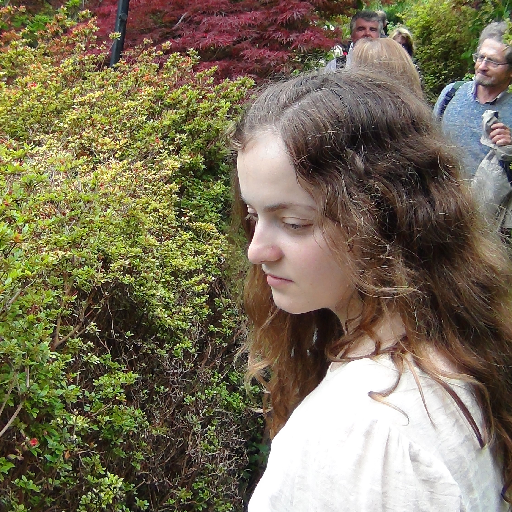

In [30]:
content

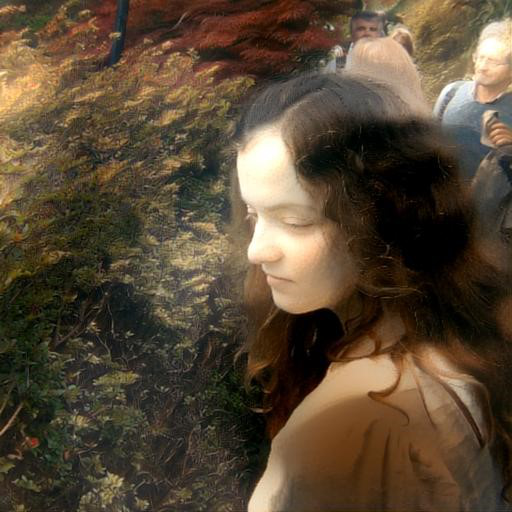

In [31]:
pastiche

In [32]:
# Subtract the data -- easiest thing
sub = pastiche_data - content_data


sub_positive = deepcopy(sub)
sub_negative = deepcopy(sub)
(x,y,col) = sub.shape
for i in range(x):
    for j in range(y):
        for k in range(col):
            if (sub[i,j,k] > 0):
                sub_negative[i,j,k] = 0
            elif (sub[i,j,k] < 0):
                sub_positive[i,j,k] = 0
        
sub_negative *= -1
# Need to normalize ...
sub += 255
sub /= 2

(R, G, B) = (sub[:,:,0], sub[:,:,1], sub[:,:,2])

In [33]:
#fig = plt.figure(figsize=(12,12))
#plt.imshow(sub, figure=fig)

(R, G, B) = (sub_positive[:,:,0], sub_positive[:,:,1], sub_positive[:,:,2])
(R_neg, G_neg, B_neg) = (sub_negative[:,:,0], sub_negative[:,:,1], sub_negative[:,:,2])
pos_input = np.clip(deepcopy(sub_positive), 0, 255).astype('uint8')
neg_input = np.clip(deepcopy(sub_negative), 0, 255).astype('uint8')

R_in = np.clip(R, 0, 255).astype('uint8')
G_in = np.clip(G, 0, 255).astype('uint8')
B_in = np.clip(B, 0, 255).astype('uint8')
R_in_neg = np.clip(R_neg, 0, 255).astype('uint8')
G_in_neg = np.clip(G_neg, 0, 255).astype('uint8')
B_in_neg = np.clip(B_neg, 0, 255).astype('uint8')

sub_positive_pil = Image.fromarray(pos_input)
sub_negative_pil = Image.fromarray(neg_input)
R_pil = Image.fromarray(R_in)
G_pil = Image.fromarray(G_in)
B_pil = Image.fromarray(B_in)
R_neg_pil = Image.fromarray(R_in_neg)
G_neg_pil = Image.fromarray(G_in_neg)
B_neg_pil = Image.fromarray(B_in_neg)

R_hist = R_pil.histogram()
G_hist = G_pil.histogram()
B_hist = B_pil.histogram()
R_neg_hist = R_neg_pil.histogram()
G_neg_hist = G_neg_pil.histogram()
B_neg_hist = B_neg_pil.histogram()

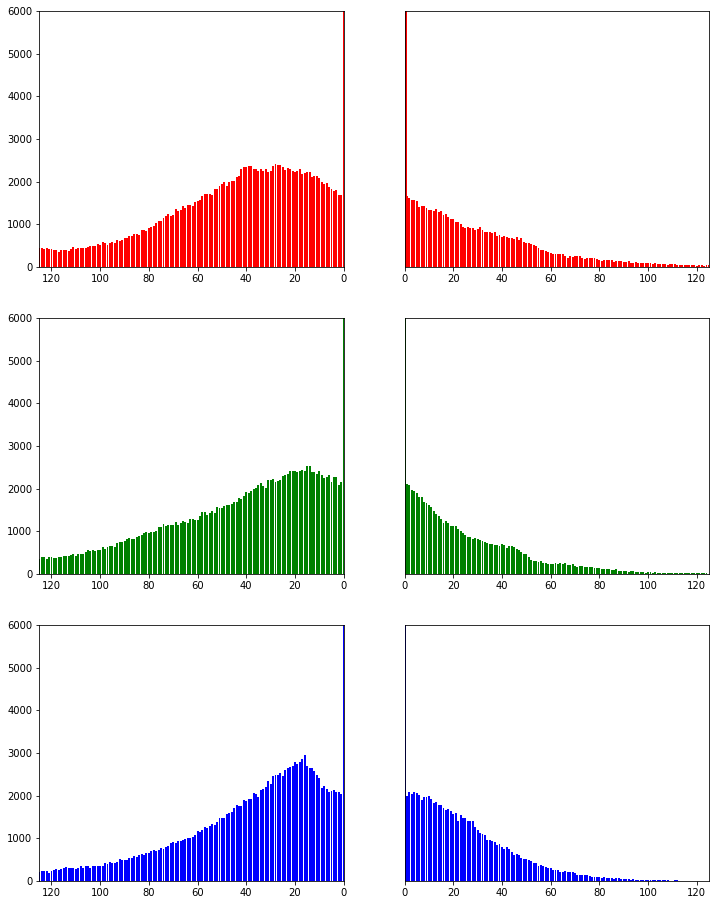

In [34]:
color_val_R = np.arange(len(R_hist))

fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(3,2,1)
ax1.bar(color_val_R, R_neg_hist, color='r')
ax1.set_ylim([0,6e3])
ax1.set_xlim([125,0])

ax2 = fig.add_subplot(3,2,2)
ax2.bar(color_val_R, R_hist, color='r',edgecolor='r')
ax2.set_ylim([0,6e3])
ax2.set_xlim([0,125])
ax2.axes.yaxis.set_visible(False)


ax3 = fig.add_subplot(3,2,3)
ax3.bar(color_val_R, G_neg_hist, color='g')
ax3.set_ylim([0,6e3])
ax3.set_xlim([125,0])

ax4 = fig.add_subplot(3,2,4)
ax4.bar(color_val_R, G_hist, color='g')
ax4.set_ylim([0,6e3])
ax4.set_xlim([0,125])
ax4.axes.yaxis.set_visible(False)


ax5 = fig.add_subplot(3,2,5)
ax5.bar(color_val_R, B_neg_hist, color='b')
ax5.set_ylim([0,6e3])
ax5.set_xlim([125,0])

ax6 = fig.add_subplot(3,2,6)
ax6.bar(color_val_R, B_hist, color='b')
ax6.set_ylim([0,6e3])
ax6.set_xlim([0,125])
ax6.axes.yaxis.set_visible(False)

In [35]:
R_index = np.where( np.array(R_neg_hist[1:]) == max(np.array(R_neg_hist[1:])))[0][0]
G_index = np.where( np.array(G_neg_hist[1:]) == max(np.array(G_neg_hist[1:])))[0][0]
B_index = np.where( np.array(B_neg_hist[1:]) == max(np.array(B_neg_hist[1:])))[0][0]
print("(R,G,B) = (" + str(R_index) + ", " + str(G_index) + ", " + str(B_index) + ")")

(R,G,B) = (27, 13, 15)


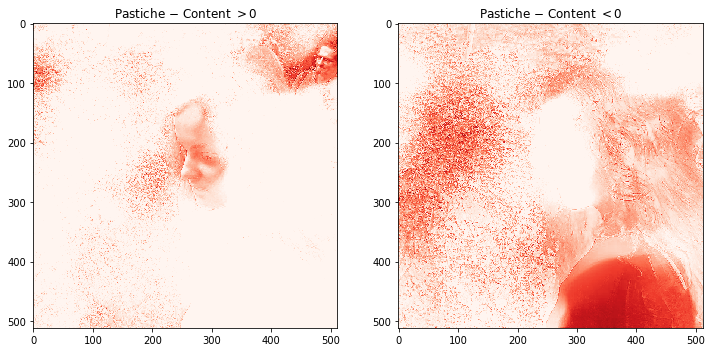

In [51]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(R, figure=fig, cmap=cm.Reds)
ax1.set_title(r'Pastiche $-$ Content $> 0$')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(R_neg, figure=fig, cmap=cm.Reds)
ax2.set_title(r'Pastiche $-$ Content $< 0$')

fig.savefig('Pastiche-Content_only_red_2.jpg')

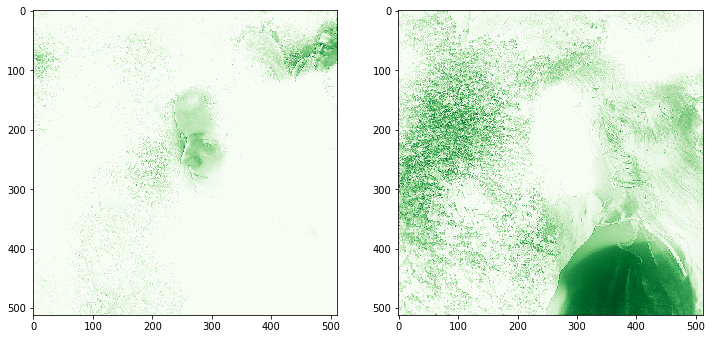

In [37]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(G, figure=fig, cmap=cm.Greens)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(G_neg, figure=fig, cmap=cm.Greens)


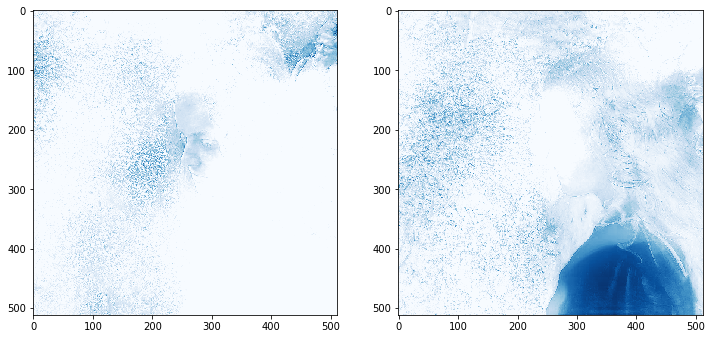

In [38]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(B, figure=fig, cmap=cm.Blues)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(B_neg, figure=fig, cmap=cm.Blues)


C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ryan Abrahams\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is s

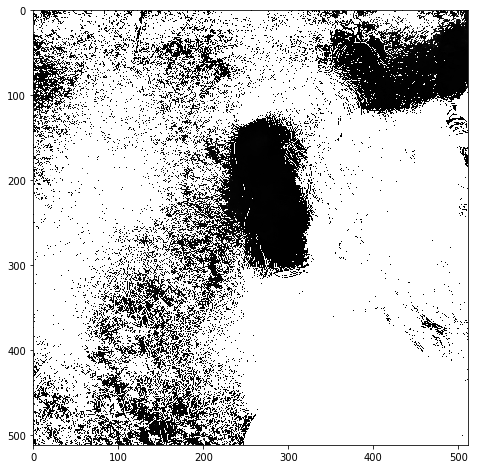

In [39]:
RtoB = deepcopy(R/B) # Ratio: Red / Blue
RtoG = deepcopy(R/G)
BtoG = deepcopy(B/G)

fig = plt.figure(figsize=(8,8))
plt.imshow(BtoG, figure=fig, cmap=cm.gray)

In [40]:
sub.shape

(512, 512, 3)

In [41]:
R_neg

array([[99., -0., -0., ..., -0., -0., -0.],
       [72., 41., 35., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., 62., 57., 44.],
       [-0., -0., -0., ..., 56., 52., 21.],
       [ 8.,  7.,  3., ..., 92., 74., 24.]], dtype=float32)

<h1>Now we can calculate the average hue of each image</h1>

In [42]:
# pastiche_data, content_data
mean = (np.mean(pastiche_data[:,:,0]), np.mean(pastiche_data[:,:,1]), np.mean(pastiche_data[:,:,2]))
mean_content = (np.mean(content_data[:,:,0]),
                                                    np.mean(content_data[:,:,1]),
                                                    np.mean(content_data[:,:,2]))

In [43]:
mean

(86.85172, 71.63219, 52.58444)

In [44]:
mean_content

(121.384895, 111.94151, 88.33647)

<h1>Or, we can look at light and dark</h1>
<p>We will look at the image histogram of the luminance.</p>

In [45]:
p_lum = pastiche_data.sum(axis=2)
c_lum = content_data.sum(axis=2)
s_lum = style_data.sum(axis=2)

Text(0.5,1,'Style')

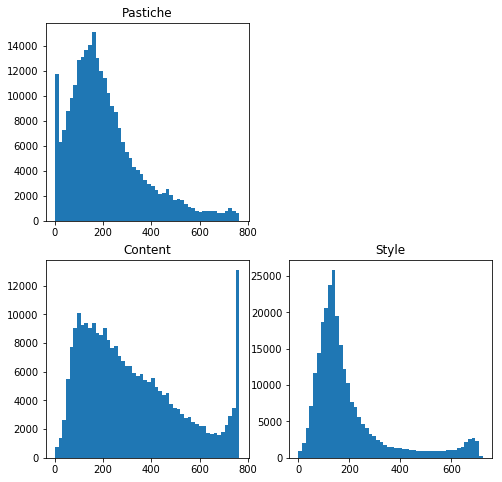

In [46]:
# pastiche luminance histogram
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
a = ax.hist(p_lum.flatten(),bins=50)
ax.set_title('Pastiche')

ax2 = fig.add_subplot(223)
a = ax2.hist(c_lum.flatten(),bins=50)
ax2.set_title('Content')

ax3 = fig.add_subplot(224)
a = ax3.hist(s_lum.flatten(), bins=50)
ax3.set_title('Style')

Text(0.5,1,'Style - Reds')

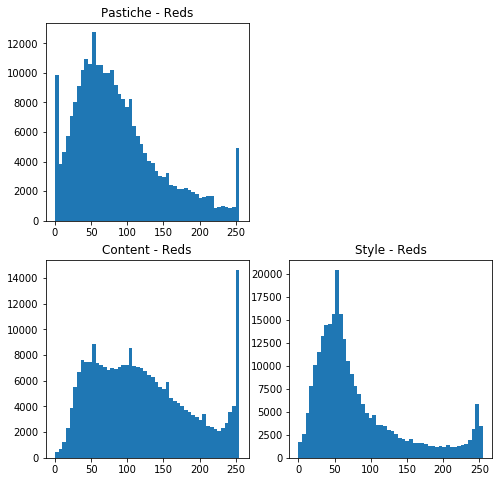

In [47]:
# Reds
col = 0

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
a = ax.hist(pastiche_data[:,:,col].flatten(),bins=50)
ax.set_title('Pastiche - Reds')

ax2 = fig.add_subplot(223)
a = ax2.hist(content_data[:,:,col].flatten(),bins=50)
ax2.set_title('Content - Reds')

ax3 = fig.add_subplot(224)
a = ax3.hist(style_data[:,:,col].flatten(), bins=50)
ax3.set_title('Style - Reds')

Text(0.5,1,'Style')

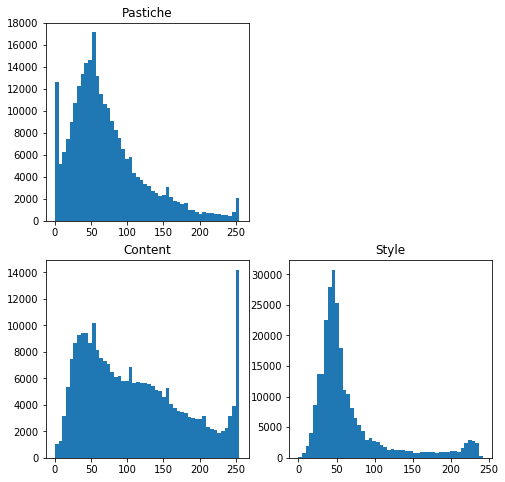

In [48]:
# pastiche luminance histogram
col = 1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
a = ax.hist(pastiche_data[:,:,col].flatten(),bins=50)
ax.set_title('Pastiche')

ax2 = fig.add_subplot(223)
a = ax2.hist(content_data[:,:,col].flatten(),bins=50)
ax2.set_title('Content')

ax3 = fig.add_subplot(224)
a = ax3.hist(style_data[:,:,col].flatten(), bins=50)
ax3.set_title('Style')

Text(0.5,1,'Style')

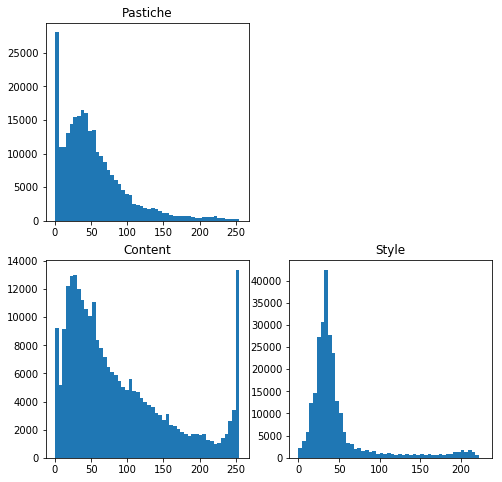

In [49]:
# pastiche luminance histogram
col = 2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
a = ax.hist(pastiche_data[:,:,col].flatten(),bins=50)
ax.set_title('Pastiche')

ax2 = fig.add_subplot(223)
a = ax2.hist(content_data[:,:,col].flatten(),bins=50)
ax2.set_title('Content')

ax3 = fig.add_subplot(224)
a = ax3.hist(style_data[:,:,col].flatten(), bins=50)
ax3.set_title('Style')